In [1]:
import numpy as np
import pandas as pd
import sys
import scipy.stats

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../codes')

In [4]:
from VMSfunctions.model import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

### Generates Empirical Data

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [5]:
ps = load_obj('../models/peak_sampler_4_beers.p')

Creates a liquid chromatography column, with 3 `KnownChemical`.

In [30]:
# need vinny to fix
# formula_strings = ['C8H10N4O2', 'C6H9N3O2', 'C5H9NO2']
# column = KnownColumn('LC', formula_strings, ps)

Creates a liquid chromatography column, with 10 `UnknownChemical`.

In [12]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
num_chemicals = 10
column = UnknownColumn('LC', num_chemicals, ps, xcms_output)

Loading observed chromatograms
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000


Plot the 10 chemicals

UnknownChemical mz=130.1981 rt=414.22 max_intensity=1.00


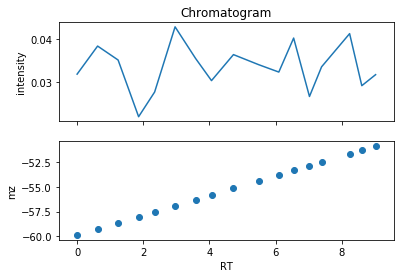

UnknownChemical mz=301.2149 rt=753.28 max_intensity=1.00


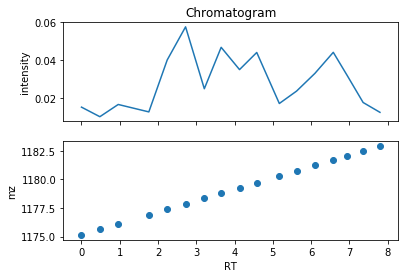

UnknownChemical mz=277.6952 rt=784.53 max_intensity=1.00


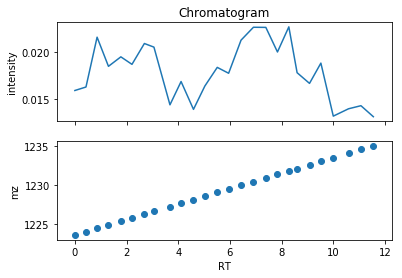

UnknownChemical mz=297.5877 rt=1232.91 max_intensity=1.00


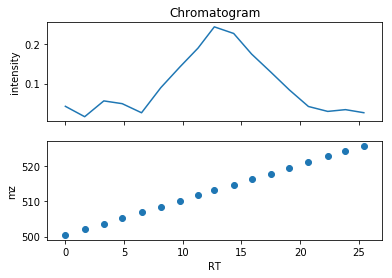

UnknownChemical mz=117.7188 rt=1011.34 max_intensity=1.00


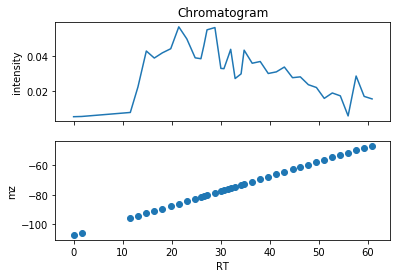

UnknownChemical mz=145.0978 rt=520.22 max_intensity=1.00


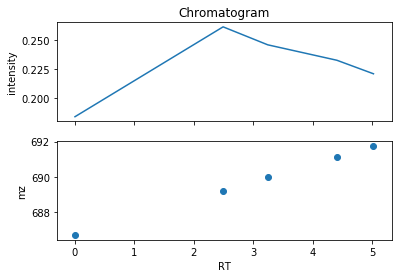

UnknownChemical mz=114.2660 rt=997.85 max_intensity=1.00


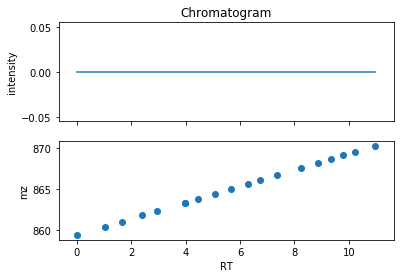

UnknownChemical mz=132.7574 rt=354.43 max_intensity=1.00


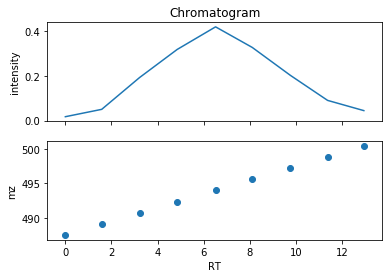

UnknownChemical mz=290.1070 rt=650.61 max_intensity=1.00


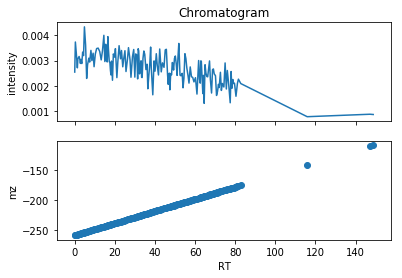

UnknownChemical mz=189.0004 rt=1101.64 max_intensity=1.00


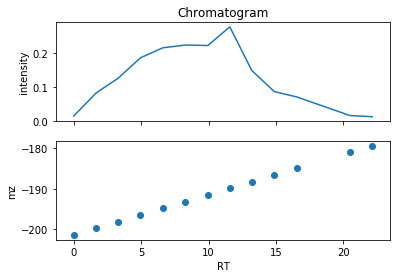

In [24]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in column.chemicals:
    print(chem)
    plot_chromatogram(chem.chromatogram)

Connect the column to mass spec. Define some scan intervals

In [31]:
scan_intervals = np.arange(0, 10)+1
scan_levels = np.zeros_like(scan_intervals)
scan_levels.fill(1)
print(scan_intervals)
print(scan_levels)

[ 1  2  3  4  5  6  7  8  9 10]
[1 1 1 1 1 1 1 1 1 1]


In [32]:
mass_spec = IndependentMassSpectrometer(column, scan_intervals, scan_levels)

In [33]:
for scan in mass_spec:
    print(scan)

Scan 0 -- num_peaks=0 rt=1.00 ms_level=1
Scan 1 -- num_peaks=0 rt=2.00 ms_level=1
Scan 2 -- num_peaks=0 rt=3.00 ms_level=1
Scan 3 -- num_peaks=0 rt=4.00 ms_level=1
Scan 4 -- num_peaks=0 rt=5.00 ms_level=1
Scan 5 -- num_peaks=0 rt=6.00 ms_level=1
Scan 6 -- num_peaks=0 rt=7.00 ms_level=1
Scan 7 -- num_peaks=0 rt=8.00 ms_level=1
Scan 8 -- num_peaks=0 rt=9.00 ms_level=1
Scan 9 -- num_peaks=0 rt=10.00 ms_level=1


### Generates Synthetic data

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

In [ ]:
# chrom = FunctionalChromatogram("normal", [0,1])
# formula = Formula("hg",100)
# isotopes = Isotopes(formula,[0.8,0.2],["Mono","1C13"])
# aducts = Aducts(formula,["M+H","M+ACN"],[0.9,0.1])
# chem = KnownChemical(formula,isotopes,aducts,100, 10000, chrom, None)
# print(chem.formula)
# print(chem.isotopes)
# print(chem.aducts)